In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
eda = pd.read_csv('../Data/2018-10-01-00_2018-11-30-00_tti.csv',index_col = 'Unnamed: 0')

D:\Programming\Anaconda\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [22]:
eda

,ID,Time,TTI,Speed
7206,283333,2018-10-01 00:00:00,1.35850,26.5629
7207,282694,2018-10-01 00:00:00,1.11910,34.6112
7208,282067,2018-10-01 00:00:00,1.31655,33.4279
7209,283073,2018-10-01 00:00:00,1.01218,38.3031
7210,282283,2018-10-01 00:00:00,1.36847,71.8417
...,...,...,...,...
13992495,281945,2018-11-30 23:50:00,1.11149,40.7169
13992496,282365,2018-11-30 23:50:00,1.22311,31.2789
13992497,282367,2018-11-30 23:50:00,1.04580,76.9159
13992498,282500,2018-11-30 23:50:00,1.41778,30.5496


In [9]:
#eda.columns = ['ID','Time','TTI','Speed']

In [23]:
#eda[eda['Time']==('2018-12-01 00:00:00')]#7205,13992499

In [24]:
#eda.iloc[7206:13992500].to_csv('../Data/2018-10-01-00_2018-11-30-00_tti.csv')

In [25]:
IDlist = list(eda['ID'])

In [26]:
result = pd.value_counts(IDlist) 

In [95]:
result

283509    8783
281932    8783
282978    8783
281929    8783
281928    8783
          ... 
282869     282
282104     243
283146     102
282947      13
283315       7
Length: 1668, dtype: int64

In [33]:
print(result.values)

[8783 8783 8783 ...  102   13    7]


In [49]:
print(len(result))

1668


In [41]:
newresult = pd.value_counts(result.values)

In [78]:
newresult

8783    447
8782     79
8781     42
8780     27
8779     22
       ... 
3377      1
7774      1
7773      1
7768      1
2045      1
Length: 605, dtype: int64

In [94]:
pd.value_counts(newresult.values) 

1      421
2       98
3       34
4       18
7        7
5        5
6        5
11       2
8        2
10       2
447      1
79       1
14       1
16       1
17       1
19       1
20       1
22       1
27       1
42       1
12       1
dtype: int64

In [91]:
newnewresult = newresult[newresult.index[155:205]]

In [71]:
np.sum(newnewresult.values)

703

In [72]:
frac = newnewresult.values/np.sum(newnewresult.values)

In [73]:
label = newnewresult.index

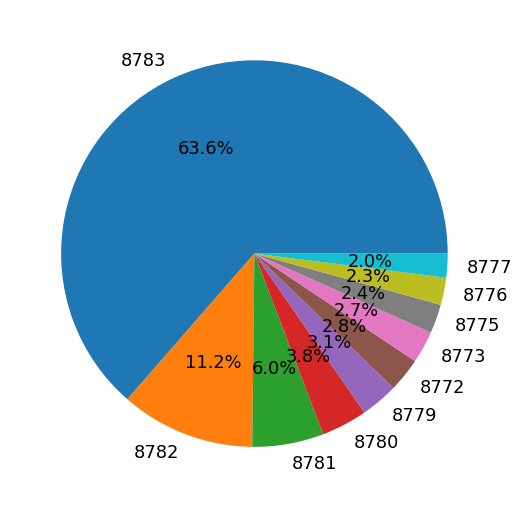

In [77]:
plt.pie(x=frac,labels= label,autopct='%0.1f%%')
#plt.legend()
plt.show()

<BarContainer object of 605 artists>

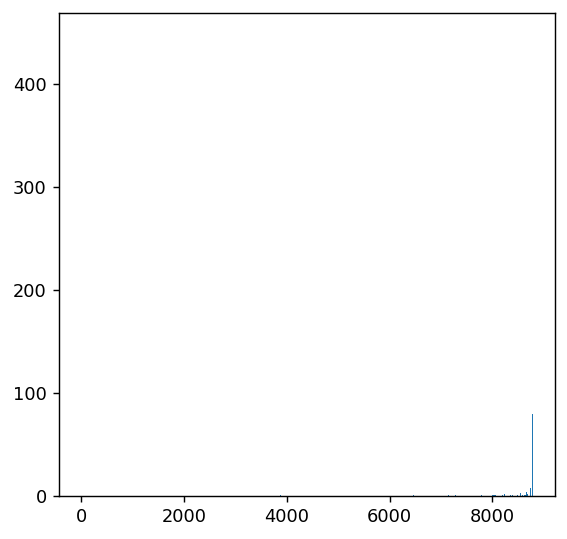

In [46]:
#result.to_csv('edaresult.csv')
#plt.rcParams['figure.dpi'] = 128
#plt.rcParams['savefig.dpi'] = 128
#plt.rcParams['figure.figsize']=(5,5)
plt.bar(newresult.index, newresult.values)

In [96]:
TTIlist = list(eda['TTI'])

In [100]:
plotdata = TTIlist
print(np.mean(plotdata))
print(np.min(plotdata))
print(np.max(plotdata))
print(np.median(plotdata))
print(np.percentile(plotdata, [25, 50, 75]))
print(np.var(plotdata))
print(np.max(plotdata)-np.min(plotdata))

1.447454785961597
0.131779
507.394
1.3151700000000002
[1.15855 1.31517 1.53686]
0.7943669177665075
507.262221


In [103]:
plotdata.remove(507.394)

ValueError: list.remove(x): x not in list

In [117]:
plotdata = TTIlist
print(np.percentile(plotdata, [1, 50, 99]))

[0.91832892 1.31517    3.6549208 ]


In [131]:
newlist = list()
for k in TTIlist:
    if (k< 3.6549208) and (k > 0.91832892): 
        newlist.append(k)

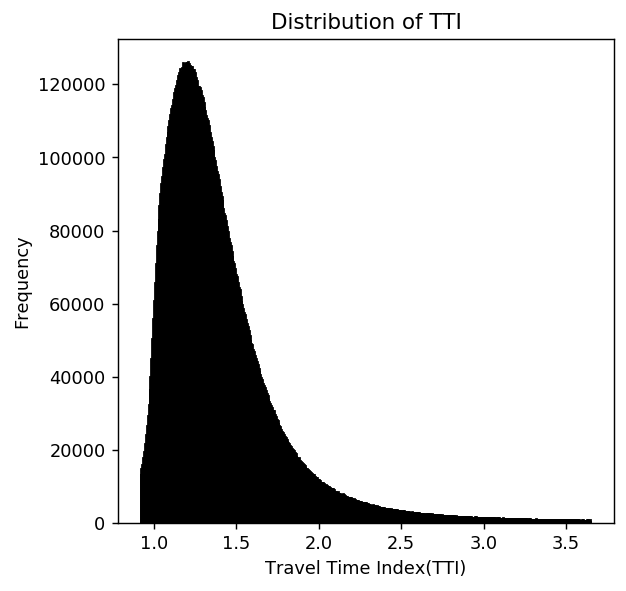

In [121]:
plt.hist(x = newlist, bins = 500, color = 'steelblue', edgecolor = 'black')
plt.xlabel('Travel Time Index(TTI)')
plt.ylabel('Frequency')
plt.title('Distribution of TTI')
plt.show()

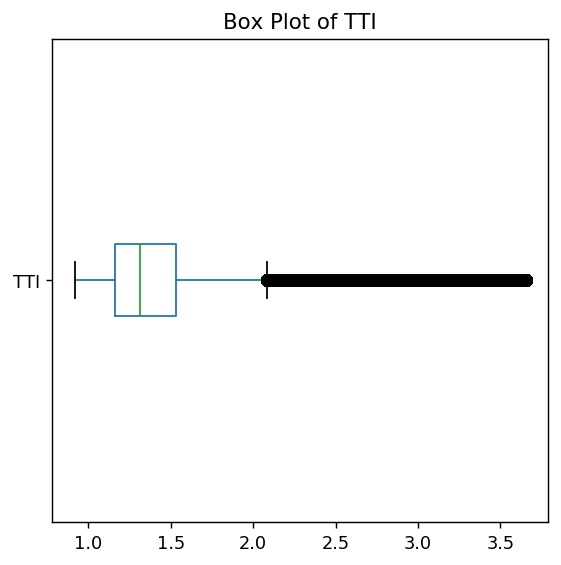

In [122]:
data = pd.DataFrame({'TTI':newlist})
data.plot.box(vert = False,title="Box Plot of TTI")
plt.show()

In [123]:
plotdata = list(eda['Speed'])
print(np.mean(plotdata))
print(np.min(plotdata))
print(np.max(plotdata))
print(np.median(plotdata))
print(np.percentile(plotdata, [25, 50, 75]))
print(np.var(plotdata))
print(np.max(plotdata)-np.min(plotdata))

33.55209978035945
0.1
150.0
31.5732
[24.9988 31.5732 38.8447]
197.34734456829875
149.9


In [124]:
print(np.percentile(plotdata, [1, 50, 99]))

[10.3769 31.5732 95.3101]


In [125]:
newlist = list()
for k in plotdata:
    if (k< 95.3101) and (k > 10.3769): 
        newlist.append(k)

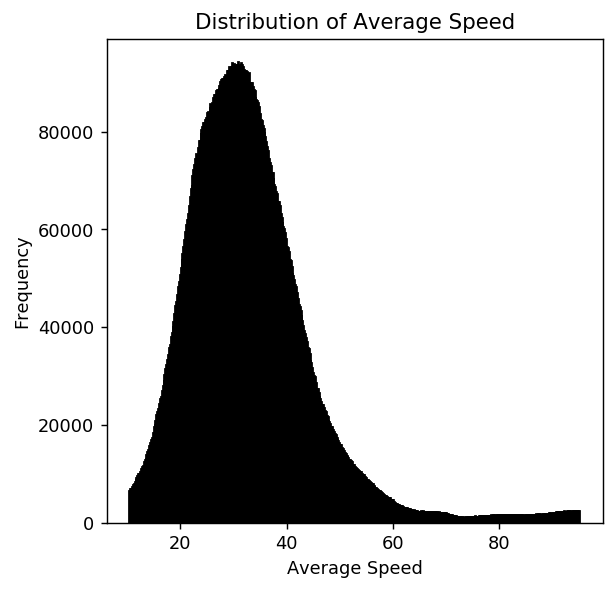

In [128]:
plt.hist(x = newlist, bins = 500, color = 'steelblue', edgecolor = 'black')
plt.xlabel('Average Speed')
plt.ylabel('Frequency')
plt.title('Distribution of Average Speed')
plt.show()

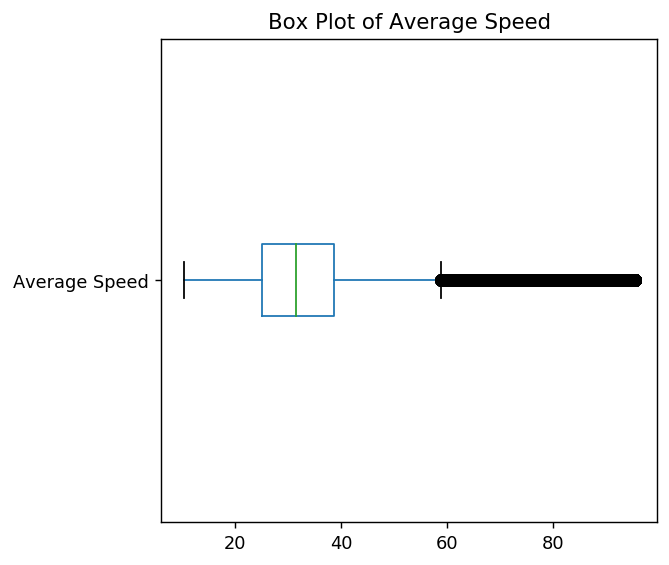

In [127]:
data = pd.DataFrame({'Average Speed':newlist})
data.plot.box(vert = False,title="Box Plot of Average Speed")
plt.show()

In [129]:
from scipy import stats

In [132]:
x = newlist
print(stats.skew(x) )
print(stats.kurtosis(x)) 

2.105229954171612
6.498173271902418


In [141]:
individualplot = eda[eda['ID']==(283509)]

In [142]:
#individualplot

In [143]:
individualplot[:144]

,ID,Time,TTI,Speed
8786,283509,2018-10-01 00:00:00,1.14481,42.7306
8929,283509,2018-10-01 00:10:00,1.17140,41.7606
10696,283509,2018-10-01 00:20:00,1.18530,41.2707
12463,283509,2018-10-01 00:30:00,1.08789,44.9662
14255,283509,2018-10-01 00:40:00,1.04623,46.7569
...,...,...,...,...
232505,283509,2018-10-01 23:10:00,1.14662,42.9077
232670,283509,2018-10-01 23:20:00,1.10983,44.3301
234404,283509,2018-10-01 23:30:00,1.13726,43.2608
236154,283509,2018-10-01 23:40:00,1.12576,43.7029


In [151]:
ttilist = list(individualplot[:576]['TTI'])
speed = list(individualplot[:576]['Speed'])

In [146]:
np.arange(0,1440,10)

array([   0,   10,   20,   30,   40,   50,   60,   70,   80,   90,  100,
        110,  120,  130,  140,  150,  160,  170,  180,  190,  200,  210,
        220,  230,  240,  250,  260,  270,  280,  290,  300,  310,  320,
        330,  340,  350,  360,  370,  380,  390,  400,  410,  420,  430,
        440,  450,  460,  470,  480,  490,  500,  510,  520,  530,  540,
        550,  560,  570,  580,  590,  600,  610,  620,  630,  640,  650,
        660,  670,  680,  690,  700,  710,  720,  730,  740,  750,  760,
        770,  780,  790,  800,  810,  820,  830,  840,  850,  860,  870,
        880,  890,  900,  910,  920,  930,  940,  950,  960,  970,  980,
        990, 1000, 1010, 1020, 1030, 1040, 1050, 1060, 1070, 1080, 1090,
       1100, 1110, 1120, 1130, 1140, 1150, 1160, 1170, 1180, 1190, 1200,
       1210, 1220, 1230, 1240, 1250, 1260, 1270, 1280, 1290, 1300, 1310,
       1320, 1330, 1340, 1350, 1360, 1370, 1380, 1390, 1400, 1410, 1420,
       1430])

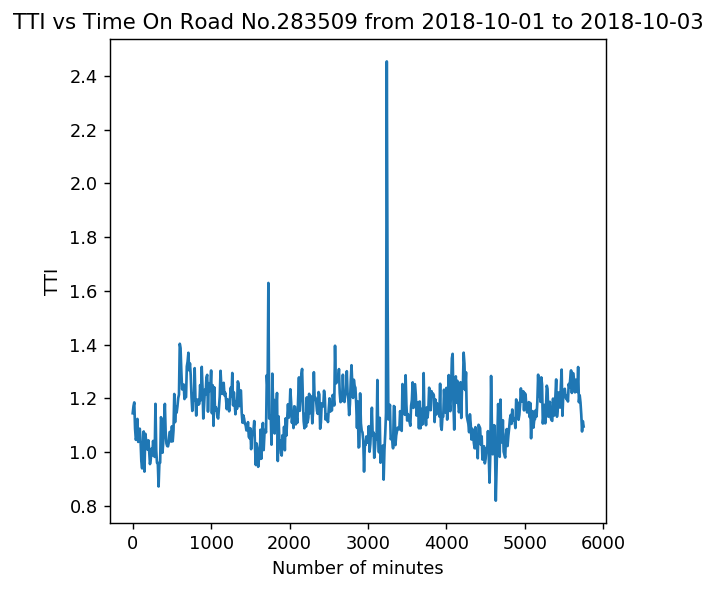

In [152]:
plt.plot(np.arange(0,5760,10),np.array(ttilist))
plt.xlabel('Number of minutes')
plt.ylabel('TTI')
plt.title('TTI vs Time On Road No.283509 from 2018-10-01 to 2018-10-03')
plt.show()

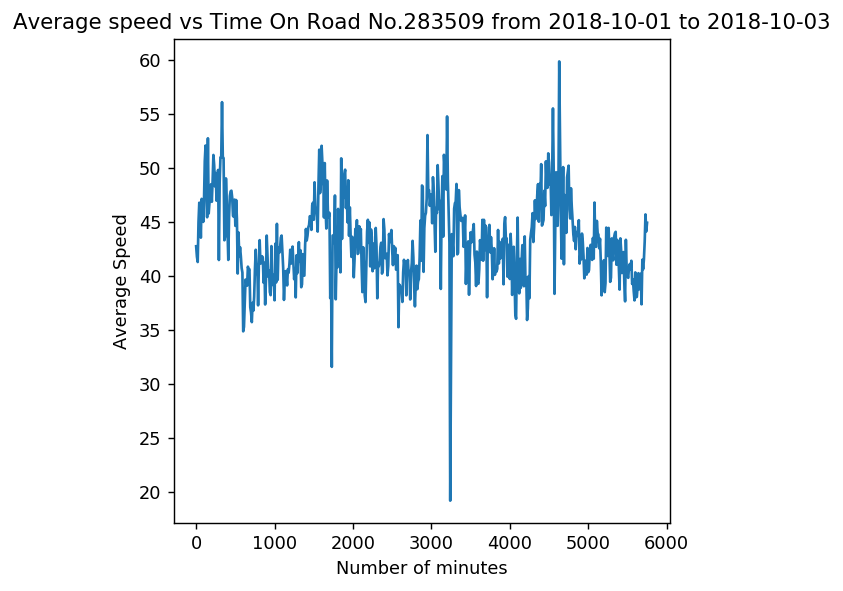

In [153]:
plt.plot(np.arange(0,5760,10),np.array(speed))
plt.xlabel('Number of minutes')
plt.ylabel('Average Speed')
plt.title('Average speed vs Time On Road No.283509 from 2018-10-01 to 2018-10-03')
plt.show()